# HOMEWORK 14

In this homework we will be working with the Fashion MNIST dataset. You will be given a classifier which suffers from considerable overfitting. Your objective will be to employ regularization techniques to mitigate the overfitting problem.

Let's start with the usual imports.

In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D, BatchNormalization
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

2024-07-24 11:34:38.852906: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Dataset

The MNIST fashgion dataset [link](https://github.com/zalandoresearch/fashion-mnist) was build by Zalando Reasearch tem consists of monochrome images of different type of clothing, namely:
* 0	T-shirt/top
* 1	Trouser
* 2	Pullover
* 3	Dress
* 4	Coat
* 5	Sandal
* 6	Shirt
* 7	Sneaker
* 8	Bag
* 9	Ankle boot

It is also one of the Keras built-in datasets. Let's load the images and quickly inspect it.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Dataset params
num_classes = 10
size = x_train.shape[1]

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    60000 samples
Test set:     10000 samples
Sample dims:  (60000, 28, 28)


Let's visualise some random samples.

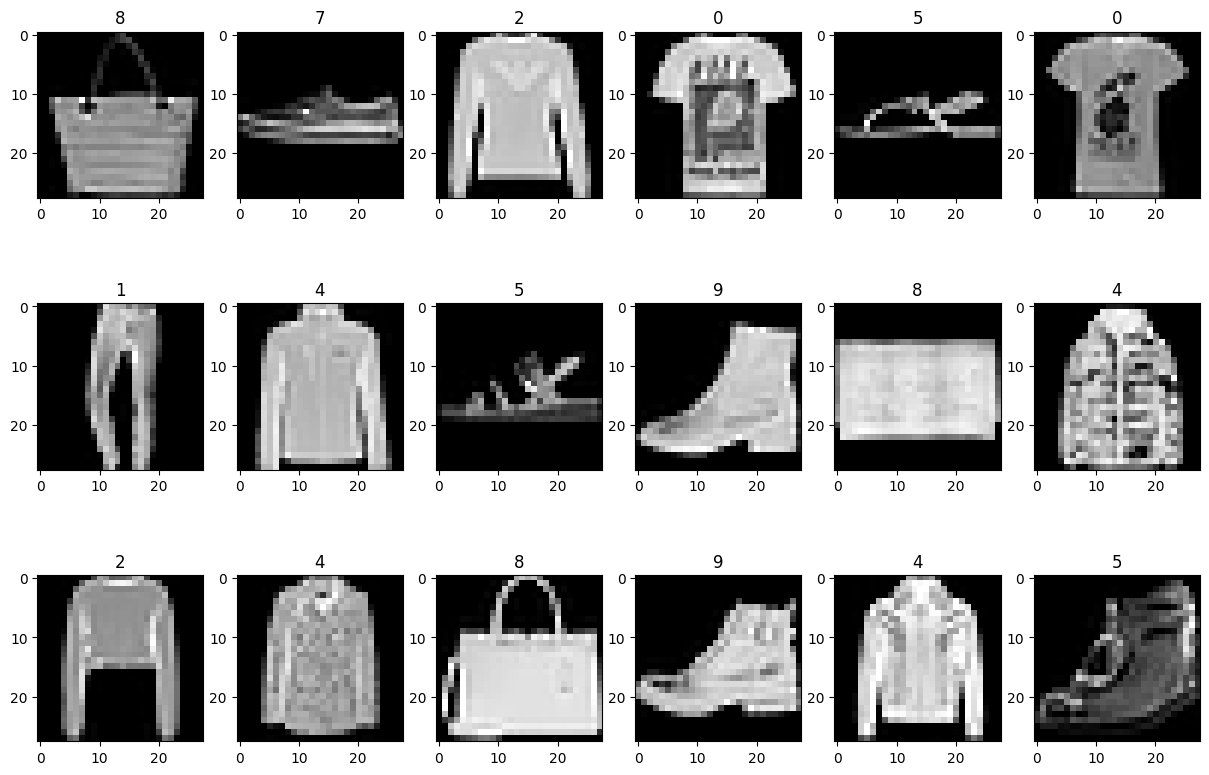

In [3]:
cnt = 1
for r in range(3):
    for c in range(6):
        idx = np.random.randint(len(x_train))
        plt.subplot(3,6,cnt)
        plt.imshow(x_train[idx, ...], cmap='gray')
        plt.title(y_train[idx])
        cnt = cnt + 1

### Building the Classifier

We are now going to build the baseline classifier that you will use throughout this homework.

In [3]:
# Data normalization
x_train = x_train/255
x_test = x_test/255

In [5]:
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = Flatten()(net)
net = Dense(128)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,213,002 (12.26 MB)

 Trainable params: 3,213,002 (12.26 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
epochs = 50
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 30s 31ms/step - accuracy: 0.8107 - loss: 0.6051 - val_accuracy: 0.8796 - val_loss: 0.3357
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 30ms/step - accuracy: 0.8988 - loss: 0.2852 - val_accuracy: 0.8881 - val_loss: 0.3106
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 30s 32ms/step - accuracy: 0.9142 - loss: 0.2399 - val_accuracy: 0.8889 - val_loss: 0.3151
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 30s 32ms/step - accuracy: 0.9256 - loss: 0.2070 - val_accuracy: 0.8938 - val_loss: 0.3222
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 33ms/step - accuracy: 0.9343 - loss: 0.1814 - val_accuracy: 0.8919 - val_loss: 0.3356
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 34ms/step - accuracy: 0.9436 - loss: 0.1600 - val_accuracy: 0.8919 - val_loss: 0.3504
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 33ms/step - accuracy: 0.9510 - loss: 0.1381 - val_accuracy: 0.8942 - val_loss: 0.3674
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 34ms/step - accuracy: 0.9551 - loss: 0.1261 - 

Train Acc      0.9941499829292297
Validation Acc 0.8794999718666077


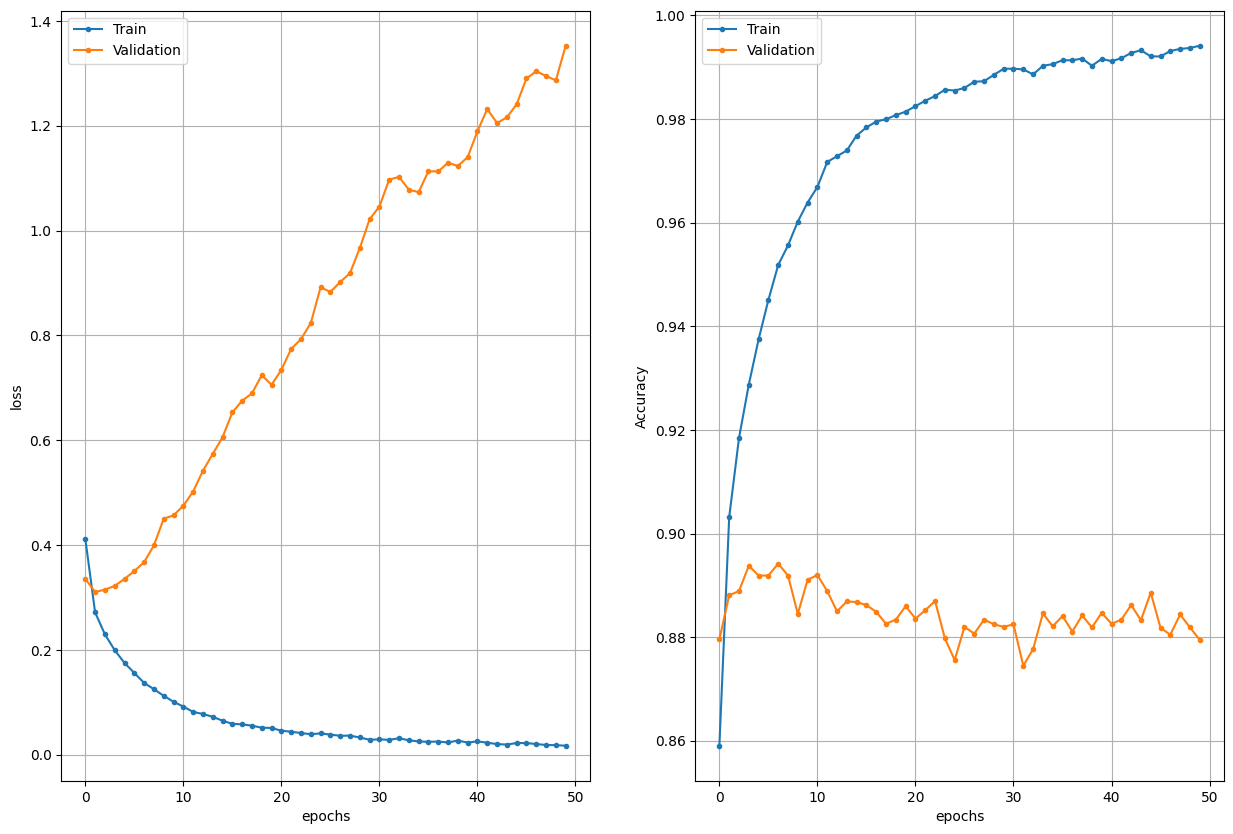

In [7]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
        
    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])
    
plot_history(history)

As you can see, the classifier suffers from massive overfitting. The validation accuracy is around 88% while the training accuracy is close to 1.

### Combat the Overfitting!

Now it is your turn. Use the classifier as a baseline, include some regularization techniques and try to improve the classification performance. You can try any techniques you might see fit, e.g.,
* Dropout
* Batch normalization
* Weight regularization
* Data augmentation
* Early stopping
* Pooling
* Reducing the number of parameters (the size of the network)
* ...

There are to objective you shall fulfill in order to successfully complete this homework:
* The validation accuracy shall be above 91%
* Your network (with all the regularizations applied) shall **not** be larger than the baseline

In [7]:
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle

# Assuming x_train, y_train, x_test, y_test are already defined

# Convert labels to one-hot encoded format if they're not already
if y_train.ndim == 1:
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

# Data generator with augmentation
def datagen(x, y, batch_size):
    num_samples = len(y)
    while True:
        x, y = shuffle(x, y)
        for idx in range(0, num_samples, batch_size):
            x_batch = x[idx:idx + batch_size].copy()
            y_batch = y[idx:idx + batch_size]
            
            # Augmentation
            for i in range(len(x_batch)):
                if np.random.rand() > 0.5:
                    x_batch[i] = np.fliplr(x_batch[i])
            
            yield x_batch, y_batch

net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.2)(net)
net = Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same')(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.2)(net)
net = Conv2D(128, kernel_size=(3, 3), activation="relu", padding='same')(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.2)(net)
net = Flatten()(net)
net = Dense(64, activation="relu")(net)
net = Dropout(0.5)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)

model.summary()

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Training parameters
epochs = 50
batch_size = 64
steps_per_epoch = len(y_train) // batch_size

# Create generator
generator = datagen(x_train, y_train, batch_size)

# Train the model
start = time()
history = model.fit(generator, steps_per_epoch=steps_per_epoch, epochs=epochs, 
                    validation_data=(x_test, y_test))
print('Elapsed time', time() - start)

x_train shape: (60000, 28, 28)
y_train shape: (60000, 10)


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,114 (652.79 KB)

 Trainable params: 167,114 (652.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 52s 53ms/step - accuracy: 0.5912 - loss: 1.1193 - val_accuracy: 0.8358 - val_loss: 0.4371
Epoch 2/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 48s 52ms/step - accuracy: 0.8127 - loss: 0.5181 - val_accuracy: 0.8674 - val_loss: 0.3628
Epoch 3/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 46s 50ms/step - accuracy: 0.8417 - loss: 0.4455 - val_accuracy: 0.8815 - val_loss: 0.3240
Epoch 4/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 43s 46ms/step - accuracy: 0.8602 - loss: 0.3951 - val_accuracy: 0.8925 - val_loss: 0.3017
Epoch 5/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 44s 47ms/step - accuracy: 0.8713 - loss: 0.3654 - val_accuracy: 0.8955 - val_loss: 0.2839
Epoch 6/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 43s 46ms/step - accuracy: 0.8795 - loss: 0.3392 - val_accuracy: 0.9003 - val_loss: 0.2778
Epoch 7/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 47s 50ms/step - accuracy: 0.8805 - loss: 0.3322 - val_accuracy: 0.8988 - val_loss: 0.2743
Epoch 8/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 48s 51ms/step - accuracy: 0.8869 - loss: 0.3151 - 

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 501,344 (1.91 MB)

 Trainable params: 167,114 (652.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 334,230 (1.27 MB)

Train Acc      0.9247030019760132
Validation Acc 0.9236000180244446


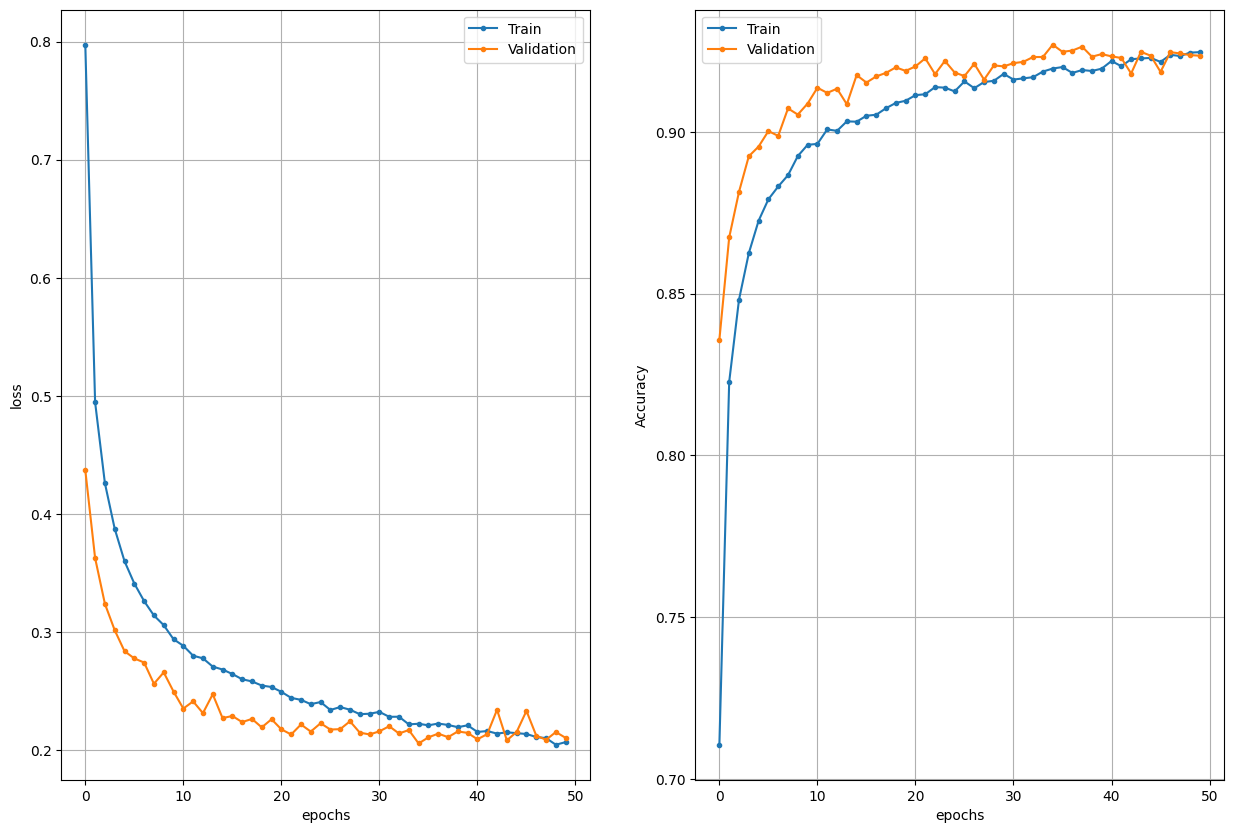

In [9]:
# Show the results
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
        
    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])
    
plot_history(history)


### Questions

* What have you done in order to improve the performance?
* Have you tried configurations that did not work out?

I tried many solutions. L2 Regularizer, Batch Normalization, Dropout, Augmentation (different), changing parameters. My first attempts were fine to kill overfitting but I was not able to get good validation accuracy, it was always 89-90. Afer many tests, I found best options - this was to add more layers, remove regularizer, remove batch normalization. Also I found some simple augmentation functions. I will save it because I can use it in future

In [ ]:
from scipy.ndimage import zoom
from scipy.ndimage import shift
from scipy.ndimage import rotate

def random_rotation(image, max_angle=15):
    angle = np.random.uniform(-max_angle, max_angle)
    return rotate(image, angle, reshape=False)

def random_shift(image, max_shift=2):
    dx, dy = np.random.randint(-max_shift, max_shift+1, size=2)
    return shift(image, [dy, dx, 0])

def cutout(image, num_cutouts=1, size=6):
    mask = np.ones_like(image)
    for _ in range(num_cutouts):
        y = np.random.randint(image.shape[0])
        x = np.random.randint(image.shape[1])
        y1 = np.clip(y - size // 2, 0, image.shape[0])
        y2 = np.clip(y + size // 2, 0, image.shape[0])
        x1 = np.clip(x - size // 2, 0, image.shape[1])
        x2 = np.clip(x + size // 2, 0, image.shape[1])
        mask[y1:y2, x1:x2] = 0
    return image * mask

def random_contrast(image, lower=0.8, upper=1.2):
    factor = np.random.uniform(lower, upper)
    mean = np.mean(image, axis=(0,1), keepdims=True)
    return np.clip((image - mean) * factor + mean, 0, 1)

def random_brightness(image, max_delta=0.2):
    delta = np.random.uniform(-max_delta, max_delta)
    return np.clip(image + delta, 0, 1)

def add_gaussian_noise(image, mean=0, std=0.05):
    noise = np.random.normal(mean, std, image.shape)
    noisy_image = image + noise
    return np.clip(noisy_image, 0, 1)

def random_zoom(image, zoom_range=(0.9, 1.1)):
    zoom_factor = np.random.uniform(zoom_range[0], zoom_range[1])
    h, w = image.shape[:2]
    zh = int(np.round(h * zoom_factor))
    zw = int(np.round(w * zoom_factor))
    zoomed = zoom(image, (zh/h, zw/w, 1))
    
    # Crop or pad to maintain original dimensions
    if zoom_factor > 1:
        crop_h = (zh - h) // 2
        crop_w = (zw - w) // 2
        zoomed = zoomed[crop_h:crop_h+h, crop_w:crop_w+w]
    elif zoom_factor < 1:
        pad_h = (h - zh) // 2
        pad_w = (w - zw) // 2
        zoomed = np.pad(zoomed, ((pad_h, h-zh-pad_h), (pad_w, w-zw-pad_w), (0,0)), mode='constant')
    
    return zoomed

def datagen(x, y, batch_size):
    num_samples = len(y)
    while True:
        x, y = shuffle(x, y)
        for idx in range(0, num_samples, batch_size):
            x_batch = x[idx:idx + batch_size].copy()
            y_batch = y[idx:idx + batch_size]
            
            for i in range(len(x_batch)):
                if np.random.rand() > 0.5:
                    x_batch[i] = np.fliplr(x_batch[i])
                if np.random.rand() > 0.5:
                    x_batch[i] = random_rotation(x_batch[i])
                if np.random.rand() > 0.5:
                    x_batch[i] = random_shift(x_batch[i])
                if np.random.rand() > 0.5:
                    x_batch[i] = random_zoom(x_batch[i])
                if np.random.rand() > 0.5:
                    x_batch[i] = add_gaussian_noise(x_batch[i])
                if np.random.rand() > 0.5:
                    x_batch[i] = random_brightness(x_batch[i])
                if np.random.rand() > 0.5:
                    x_batch[i] = random_contrast(x_batch[i])
                if np.random.rand() > 0.5:
                    x_batch[i] = cutout(x_batch[i])
            
            yield x_batch, y_batch